# Imports

In [1]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

%matplotlib inline

import nbimporter
from functions_folder.functions_class import Functions

<IPython.core.display.Javascript object>

In [2]:
def calc_metrics(y_test, predictions):
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        fbeta_score,
    )

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
    fbeta_recall = fbeta_score(y_test, predictions, beta=2)

    print("Accuracy score: {:.2f}".format(accuracy))
    print("Precision score: {:.2f}".format(precision))
    print("Recall score: {:.2f}".format(recall))
    print("F1 score: {:.2f}".format(f1))
    print("Fbeta score favoring precision: {:.2f}".format(fbeta_precision))
    print("FBeta score favoring recall: {:.2f}".format(fbeta_recall))
    return accuracy, precision, recall, f1, fbeta_precision, fbeta_recall


<IPython.core.display.Javascript object>

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst"
df_train_data = pd.read_csv(url, header=None, sep=" ")
df_train_data.head(25)

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1
5,41,0,84,3,38,-4,43,45,2,1
6,37,0,100,0,36,-8,63,64,2,1
7,46,0,83,0,46,0,37,36,0,1
8,44,0,79,0,42,-17,35,37,2,1
9,44,-1,78,0,44,0,34,34,0,1


<IPython.core.display.Javascript object>

In [4]:
# make target column binary classified
df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

# create a df for all features & a df for the target var
X = df_train_data.drop(columns=[9], axis=1)
y = df_train_data[9]

# create train & test vars
X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

In [5]:
# random state var
r_state = 7

<IPython.core.display.Javascript object>

In [6]:
# instance model object
model = LogisticRegression(solver="lbfgs", max_iter=1000)

# fit model to data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<IPython.core.display.Javascript object>

In [7]:
# model train & test scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("train score: %s" % train_score)
print("test score: %s" % test_score)
print("# of iterations: %s" % model.n_iter_[0])

train score: 0.8258390804597702
test score: 0.8226206896551724
# of iterations: 314


<IPython.core.display.Javascript object>

In [8]:
# dummy classifier object
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(X_train, y_train)

dummy_score = dummy_model.score(X_test, y_test)
print(dummy_score)

0.5028965517241379


<IPython.core.display.Javascript object>

> Our model accuracy is about 32% better than random guessing
---

In [9]:
# model confusion matrix
predictions = model.predict(X_test)

# create confusion matrix from predictions
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])

# create DF from matrix
confusion_df = pd.DataFrame(
    confusion, index=["actual_0", "actual_1"], columns=["predicted_0", "predicted_1"]
).T
confusion_df

,actual_0,actual_1
predicted_0,27,120
predicted_1,523,2955


<IPython.core.display.Javascript object>

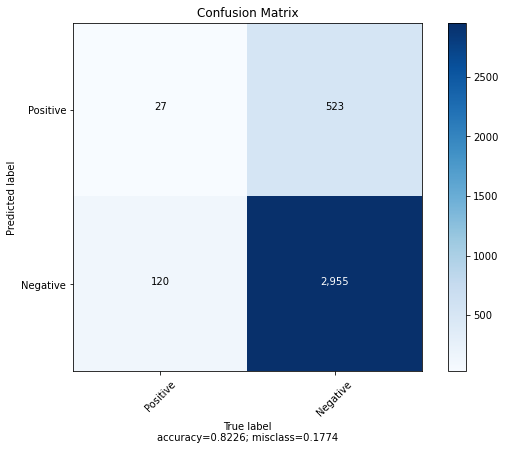

<IPython.core.display.Javascript object>

In [10]:
# plot confusion matrix function
Functions.plot_confusion_matrix(
    cm=confusion,
    target_names=["Positive", "Negative"],
    title="Confusion Matrix",
    normalize=False,
)

In [11]:
# metrics calculations
calc_metrics(y_test, predictions)

Accuracy score: 0.82
Precision score: 0.18
Recall score: 0.05
F1 score: 0.08
Fbeta score favoring precision: 0.12
FBeta score favoring recall: 0.06


(0.8226206896551724,
 0.1836734693877551,
 0.04909090909090909,
 0.07747489239598278,
 0.11862917398945516,
 0.057520238602471234)

<IPython.core.display.Javascript object>

In [12]:
# print classification report
report = classification_report(
    y_test, predictions, target_names=["Negative", "Positive"]
)
print(report)

              precision    recall  f1-score   support

    Negative       0.85      0.96      0.90      3075
    Positive       0.18      0.05      0.08       550

    accuracy                           0.82      3625
   macro avg       0.52      0.51      0.49      3625
weighted avg       0.75      0.82      0.78      3625



<IPython.core.display.Javascript object>

In [13]:
# ROC curve & AUC
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

<IPython.core.display.Javascript object>

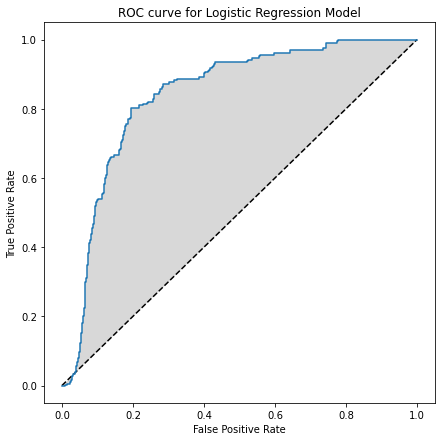

area under the curve: 0.8393584626755359


<IPython.core.display.Javascript object>

In [14]:
# plot roc curve
fig = plt.figure(figsize=(7, 7))
# dashed line
plt.plot([0, 1], [0, 1], "k--")
# plot the false positive rate & true positive rate
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, "grey", alpha=0.3)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Logistic Regression Model")
plt.show()
print("area under the curve: %s" % auc)

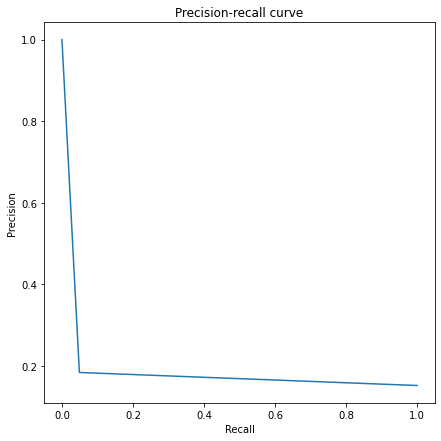

<IPython.core.display.Javascript object>

In [15]:
# plot precision-recall curve
pres, rec, thresholds = precision_recall_curve(y_test, predictions)

plt.figure(figsize=(7, 7))
plt.plot(rec, pres)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall curve")
plt.show()

In [16]:
# optimize C score value in model
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    # instance model object
    model = LogisticRegression(
        solver="lbfgs", penalty="l2", C=c, max_iter=1000, random_state=r_state
    )
    # let model learn training data
    model.fit(X_train, y_train)
    # test & training score vars
    test_score = model.score(X_test, y_test)
    train_score = model.score(X_train, y_train)
    # append scores to lists
    test_accuracy.append(test_score)
    train_accuracy.append(train_score)

<IPython.core.display.Javascript object>

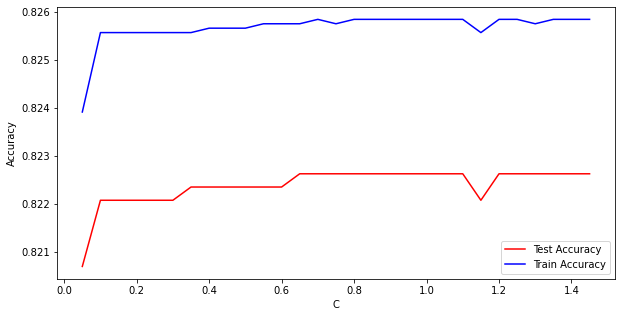

<IPython.core.display.Javascript object>

In [17]:
# plot c values vs. test/train accuracy
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(1, 1, 1)
ax2.plot(c_vals, test_accuracy, "-r", label="Test Accuracy")
ax2.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
ax2.set(xlabel="C", ylabel="Accuracy")
ax2.legend()
plt.show()

> optimal C = 0.4
---

# Cross-validation

In [31]:
# model creation
model = LogisticRegression(solver="lbfgs", max_iter=1000)
# model.fit(X_train, y_train)
# cross-validation of model
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
# mean of the cv scores
cv_mean = np.mean(cv_scores) * 100

print("mean cross-validation score: {:.2f}%".format(cv_mean))

mean cross-validation score: 82.61%


<IPython.core.display.Javascript object>

# k-nearest neighbor model (k=7)

In [33]:
# knn model object, k=7
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

# train and test scores
knn_train = knn_model.score(X_train, y_train)
knn_test = knn_model.score(X_test, y_test)
print("train score: {:.3f}".format(knn_train))
print("test score: {:.3f}".format(knn_test))

train score: 0.999
test score: 0.998


<IPython.core.display.Javascript object>

> the k-nearest neighbor model has 99.9% train accuracy and 99.8% test accuracy. The data isn't well divided linearly comparing with the linear regression model
---

# Random forest model

In [34]:
# random forest model object
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# train and test scores
rf_train = rf_model.score(X_train, y_train)
rf_test = rf_model.score(X_test, y_test)
print("train score: {:.3f}".format(rf_train))
print("test score: {:.3f}".format(rf_test))

train score: 1.000
test score: 1.000


<IPython.core.display.Javascript object>